<a href="https://colab.research.google.com/github/bilalsarimeseli/IBM_Customer_Churn/blob/main/IBM_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('customer_churn.csv')


In [2]:
df.head(100)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0259-GBZSH,1,United States,California,San Diego,92122,"32.85723, -117.209774",32.857230,-117.209774,Male,...,Month-to-month,Yes,Electronic check,85.65,181.5,Yes,1,73,3878,Product dissatisfaction
96,9601-BRXPO,1,United States,California,San Diego,92129,"32.961064, -117.134917",32.961064,-117.134917,Female,...,Month-to-month,Yes,Bank transfer (automatic),104.95,2566.5,Yes,1,66,3642,Service dissatisfaction
97,6905-NIQIN,1,United States,California,San Diego,92154,"32.578103, -117.012975",32.578103,-117.012975,Male,...,Month-to-month,No,Mailed check,50.65,50.65,Yes,1,76,2431,Don't know
98,5167-ZFFMM,1,United States,California,Indio,92201,"33.713891, -116.237257",33.713891,-116.237257,Male,...,Month-to-month,Yes,Credit card (automatic),90.85,90.85,Yes,1,81,3424,Network reliability


In [3]:
# Let's check if there are any null values in the DataFrame
if df.isnull().values.any():
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")


There are null values in the DataFrame.


In [4]:
missing_values = df.isna()

In [5]:
print(missing_values)

      CustomerID  Count  Country  State   City  Zip Code  Lat Long  Latitude  \
0          False  False    False  False  False     False     False     False   
1          False  False    False  False  False     False     False     False   
2          False  False    False  False  False     False     False     False   
3          False  False    False  False  False     False     False     False   
4          False  False    False  False  False     False     False     False   
...          ...    ...      ...    ...    ...       ...       ...       ...   
7038       False  False    False  False  False     False     False     False   
7039       False  False    False  False  False     False     False     False   
7040       False  False    False  False  False     False     False     False   
7041       False  False    False  False  False     False     False     False   
7042       False  False    False  False  False     False     False     False   

      Longitude  Gender  ...  Contract 

In [6]:
df.dropna(subset = ['Churn Reason'], inplace = True)
print(df)

      CustomerID  Count        Country       State          City  Zip Code  \
0     3668-QPYBK      1  United States  California   Los Angeles     90003   
1     9237-HQITU      1  United States  California   Los Angeles     90005   
2     9305-CDSKC      1  United States  California   Los Angeles     90006   
3     7892-POOKP      1  United States  California   Los Angeles     90010   
4     0280-XJGEX      1  United States  California   Los Angeles     90015   
...          ...    ...            ...         ...           ...       ...   
1864  1699-HPSBG      1  United States  California  Palm Springs     92264   
1865  8775-CEBBJ      1  United States  California        Seeley     92273   
1866  6894-LFHLY      1  United States  California         Vidal     92280   
1867  0639-TSIQW      1  United States  California   White Water     92282   
1868  8361-LTMKD      1  United States  California  Apple Valley     92307   

                    Lat Long   Latitude   Longitude  Gender  ..

In [7]:
df['Churn Reason']

0                    Competitor made better offer
1                                           Moved
2                                           Moved
3                                           Moved
4                   Competitor had better devices
                          ...                    
1864    Competitor offered higher download speeds
1865    Competitor offered higher download speeds
1866    Competitor offered higher download speeds
1867                 Competitor offered more data
1868                 Competitor offered more data
Name: Churn Reason, Length: 1869, dtype: object

In [8]:
df['Churn Reason'].isnull().any()

False

In [9]:
df['Churn Reason'].count()

1869

In [10]:
df_duplicates = df['CustomerID'].duplicated()

In [11]:
print(df_duplicates.any())

False


In [12]:
customers_of_SanJose = df[df['City'] == 'San Jose']
print(customers_of_SanJose.count())

CustomerID           29
Count                29
Country              29
State                29
City                 29
Zip Code             29
Lat Long             29
Latitude             29
Longitude            29
Gender               29
Senior Citizen       29
Partner              29
Dependents           29
Tenure Months        29
Phone Service        29
Multiple Lines       29
Internet Service     29
Online Security      29
Online Backup        29
Device Protection    29
Tech Support         29
Streaming TV         29
Streaming Movies     29
Contract             29
Paperless Billing    29
Payment Method       29
Monthly Charges      29
Total Charges        29
Churn Label          29
Churn Value          29
Churn Score          29
CLTV                 29
Churn Reason         29
dtype: int64


In [13]:
print(customers_of_SanJose['Tenure Months'])

290      4
291     37
292     19
293     39
294      7
295     14
296     11
721     10
722     15
723     17
724     53
725     16
726      9
727     25
728      4
1153    17
1154     1
1155    58
1156     1
1157    19
1603     2
1604    12
1605     1
1606     1
1607    59
1608     3
1609     1
1610     1
1611     2
Name: Tenure Months, dtype: int64


In [14]:

# I will use groupby() to group the data by the 'City' column and calculate the mean tenure for each city
city_avg_tenure = df.groupby('City')['Tenure Months'].mean()

# Find the city with the highest average tenure
city_with_highest_avg_tenure = city_avg_tenure.idxmax()
highest_avg_tenure = city_avg_tenure.max()

# Display the city with the highest average tenure and the average tenure value
print(f"The city with the highest average tenure is {city_with_highest_avg_tenure} with an average tenure of {highest_avg_tenure} months.")


The city with the highest average tenure is Big Pine with an average tenure of 71.0 months.


In [15]:
city_with_lowest_avg_tenure = city_avg_tenure.idxmin()
lowest_avg_tenure = city_avg_tenure.min()
print(f"The city with the highest average tenure is {city_with_lowest_avg_tenure} with an average tenure of {lowest_avg_tenure} months.")


The city with the highest average tenure is Ahwahnee with an average tenure of 1.0 months.


In [16]:
# Specify the name of the city you want to find the average tenure for
city_to_find = "Los Angeles"

# Filter the DataFrame for the specific city
filtered_data = df[df['City'] == city_to_find]

# Calculate the average tenure for the filtered data
average_tenure_for_city = filtered_data['Tenure Months'].mean()

# Display the average tenure for the specific city
print(f"The average tenure for {city_to_find} is {average_tenure_for_city:.2f} months.")


The average tenure for Los Angeles is 15.91 months.


In [17]:
# Filter cities with average tenure greater than 24 months
cities_above_24_months = city_avg_tenure[city_avg_tenure > 24]

# Display the list of cities with average tenure more than 24 months
print(cities_above_24_months)


City
Acampo                    25.000000
Adelanto                  61.000000
Agoura Hills              33.500000
Alturas                   67.000000
Angwin                    37.000000
                            ...    
Winterhaven               36.000000
Woodbridge                47.000000
Yorba Linda               28.666667
Yosemite National Park    31.500000
Yucaipa                   32.000000
Name: Tenure Months, Length: 239, dtype: float64


In [18]:
!pip install ipywidgets matplotlib



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.7 MB/s eta 0:00:00


In [19]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with your data loaded

# Create a list of unique city names from your DataFrame
city_names = df['City'].unique()

# Create a multi-select dropdown widget for selecting cities
city_dropdown = widgets.SelectMultiple(
    options=city_names,
    value=['San Jose'],  # Default selected cities
    rows=10,  # Number of visible rows in the dropdown
    description='Select Cities:',
    disabled=False
)

# Define a function to plot the average tenure for selected cities
def plot_cities_tenure(selected_cities):
    plt.figure(figsize=(10, 6))
    for city in selected_cities:
        filtered_data = df[df['City'] == city]
        avg_tenure = filtered_data['Tenure Months'].mean()
        plt.bar(city, avg_tenure, label=f'{city}: {avg_tenure:.2f} months')

    plt.xlabel('City')
    plt.ylabel('Average Tenure (Months)')
    plt.title('Average Tenure in Selected Cities')
    plt.legend(fontsize='small')
    plt.xticks(rotation=70)
    plt.show()

# Create an interactive output area
output = widgets.Output()

# Define a callback function to handle button click
def on_button_click(b):
    selected_cities = city_dropdown.value
    with output:
        output.clear_output()
        plot_cities_tenure(selected_cities)

# Create a button to trigger the plot
button = widgets.Button(description='Plot Tenure')
button.on_click(on_button_click)

# Display the widgets in your Colab notebook
display(city_dropdown, button, output)


SelectMultiple(description='Select Cities:', index=(219,), options=('Los Angeles', 'Beverly Hills', 'Huntingto…

Button(description='Plot Tenure', style=ButtonStyle())

Output()

In [20]:
# Get all unique values in the "Churn Reason" column
churn_reason_values = df['Churn Reason'].unique()

# Print the unique values
for value in churn_reason_values:
    print(value)

Competitor made better offer
Moved
Competitor had better devices
Competitor offered higher download speeds
Competitor offered more data
Price too high
Product dissatisfaction
Service dissatisfaction
Lack of self-service on Website
Network reliability
Limited range of services
Lack of affordable download/upload speed
Long distance charges
Extra data charges
Don't know
Poor expertise of online support
Poor expertise of phone support
Attitude of service provider
Attitude of support person
Deceased


In [21]:
# Filter the DataFrame for rows where 'Churn Reason' is 'Don't know'
dont_know_df = df[df['Churn Reason'] == "Don't know"]

# Display the filtered DataFrame
dont_know_df


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
32,2372-HWUHI,1,United States,California,Lakewood,90712,"33.840524, -118.148403",33.840524,-118.148403,Male,...,Month-to-month,No,Electronic check,44.35,81.25,Yes,1,76,2570,Don't know
33,0390-DCFDQ,1,United States,California,Los Alamitos,90720,"33.79499, -118.065591",33.794990,-118.065591,Female,...,Month-to-month,Yes,Mailed check,70.45,70.45,Yes,1,76,3964,Don't know
34,4080-OGPJL,1,United States,California,San Pedro,90731,"33.736387, -118.284363",33.736387,-118.284363,Female,...,Month-to-month,No,Electronic check,71.15,563.65,Yes,1,66,2662,Don't know
51,7841-TZDMQ,1,United States,California,Sun Valley,91352,"34.231053, -118.338307",34.231053,-118.338307,Male,...,Month-to-month,Yes,Credit card (automatic),46.00,84.5,Yes,1,76,2667,Don't know
52,9408-SSNVZ,1,United States,California,Stevenson Ranch,91381,"34.364153, -118.615583",34.364153,-118.615583,Female,...,Month-to-month,Yes,Electronic check,70.15,268.35,Yes,1,67,2227,Don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,5295-PCJOO,1,United States,California,Long Beach,90805,"33.864622, -118.179626",33.864622,-118.179626,Male,...,Month-to-month,Yes,Electronic check,49.40,184.4,Yes,1,84,4455,Don't know
1785,9863-JZAIC,1,United States,California,Long Beach,90807,"33.830099, -118.182239",33.830099,-118.182239,Male,...,Month-to-month,No,Mailed check,55.00,2010.55,Yes,1,100,2220,Don't know
1801,2446-PLQVO,1,United States,California,Santa Clarita,91350,"34.502432, -118.41459",34.502432,-118.414590,Male,...,Month-to-month,Yes,Electronic check,70.30,70.3,Yes,1,78,4512,Don't know
1816,1273-MTETI,1,United States,California,Rancho Cucamonga,91737,"34.245289, -117.642503",34.245289,-117.642503,Female,...,Month-to-month,Yes,Electronic check,88.85,372.45,Yes,1,74,2754,Don't know


In [22]:
column_names = df.columns.tolist()

# Print the list of column names
print(column_names)

['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']


In [23]:
# Group the data by "Churn Reason" and count occurrences
reason_counts = df['Churn Reason'].value_counts().reset_index()
reason_counts.columns = ['Churn Reason', 'Count']

# Print the count of each churn reason
print(reason_counts)


                                 Churn Reason  Count
0                  Attitude of support person    192
1   Competitor offered higher download speeds    189
2                Competitor offered more data    162
3                                  Don't know    154
4                Competitor made better offer    140
5                Attitude of service provider    135
6               Competitor had better devices    130
7                         Network reliability    103
8                     Product dissatisfaction    102
9                              Price too high     98
10                    Service dissatisfaction     89
11            Lack of self-service on Website     88
12                         Extra data charges     57
13                                      Moved     53
14                  Limited range of services     44
15                      Long distance charges     44
16   Lack of affordable download/upload speed     44
17            Poor expertise of phone support 

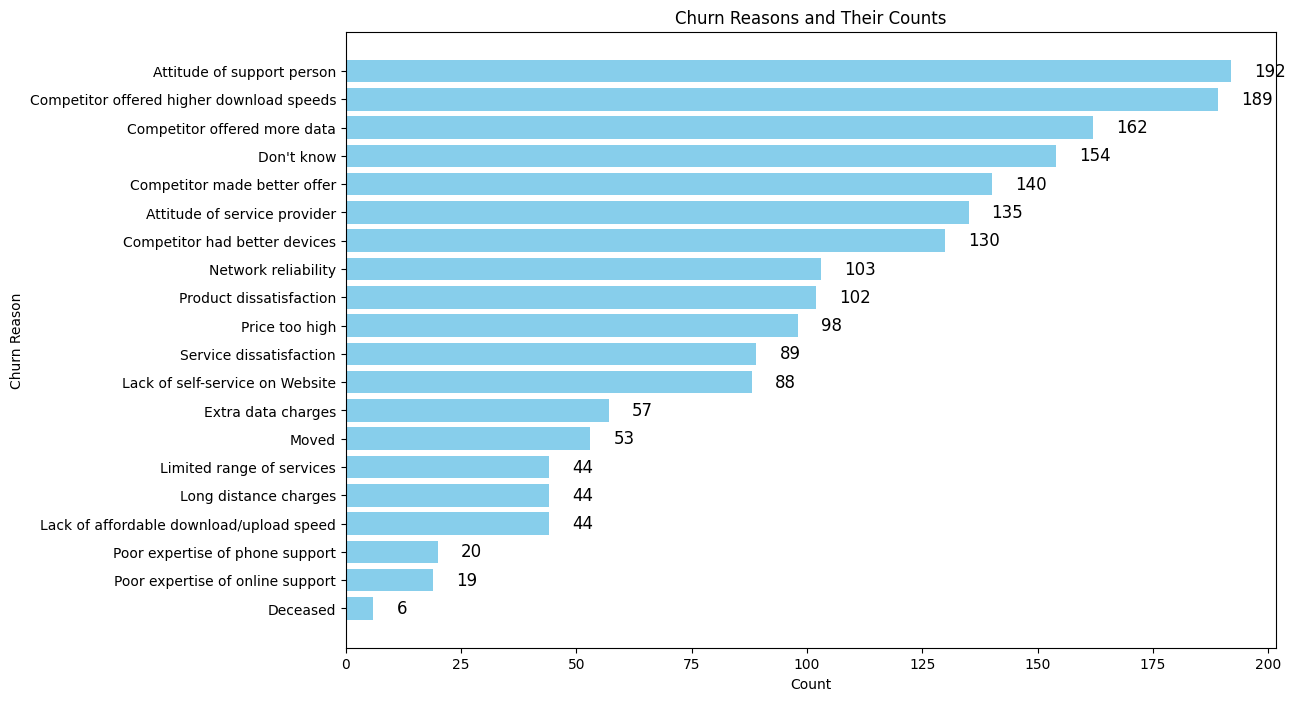

In [24]:
# Sort the DataFrame by count in descending order
reason_counts = reason_counts.sort_values(by='Count', ascending=False)

# Create a horizontal bar chart to visualize reasons and counts
plt.figure(figsize=(12, 8))
plt.barh(reason_counts['Churn Reason'], reason_counts['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.title('Churn Reasons and Their Counts')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top reason at the top

# Add labels with counts to the bars
for count, reason in zip(reason_counts['Count'], reason_counts['Churn Reason']):
    plt.text(count + 5, reason, str(count), va='center', fontsize=12)

plt.show()


In [25]:
import numpy as np

# Assuming you have a DataFrame named 'df' with churn scores and features
# Replace 'Churn_Score' with the actual name of your churn score column

# Calculate the correlation coefficients between features and churn scores
correlations = df.corr()['Churn Score'].drop('Churn Score')

# Create a dictionary to store the column names and their correlation values
correlation_dict = {col: corr for col, corr in correlations.items()}

# Print the dictionary
print(correlation_dict)


{'Count': nan, 'Zip Code': -0.02725970304594488, 'Latitude': -0.02853821646144378, 'Longitude': 0.03670939760865211, 'Tenure Months': 0.04923428939848966, 'Monthly Charges': 0.010679043725069441, 'Churn Value': nan, 'CLTV': 0.017190691005270556}


<ipython-input-25-f3c02f67e762>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['Churn Score'].drop('Churn Score')


In [26]:
max_positive_correlation_feature = correlations.idxmax()
max_negative_correlation_feature = correlations.idxmin()

# Get the correlation values for the features
max_positive_correlation_value = correlations[max_positive_correlation_feature]
max_negative_correlation_value = correlations[max_negative_correlation_feature]

print(f"Feature with the highest positive correlation: {max_positive_correlation_feature}")
print(f"Correlation value: {max_positive_correlation_value}")

print(f"Feature with the highest negative correlation: {max_negative_correlation_feature}")
print(f"Correlation value: {max_negative_correlation_value}")


Feature with the highest positive correlation: Tenure Months
Correlation value: 0.04923428939848966
Feature with the highest negative correlation: Latitude
Correlation value: -0.02853821646144378


In [27]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,1,United States,California,Palm Springs,92264,"33.745746, -116.514215",33.745746,-116.514215,Male,...,One year,Yes,Electronic check,59.80,727.8,Yes,1,69,4581,Competitor offered higher download speeds
1865,8775-CEBBJ,1,United States,California,Seeley,92273,"32.790282, -115.689559",32.790282,-115.689559,Female,...,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,1,87,2029,Competitor offered higher download speeds
1866,6894-LFHLY,1,United States,California,Vidal,92280,"34.264124, -114.717964",34.264124,-114.717964,Male,...,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1,97,5571,Competitor offered higher download speeds
1867,0639-TSIQW,1,United States,California,White Water,92282,"33.972293, -116.654195",33.972293,-116.654195,Female,...,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1,70,5620,Competitor offered more data


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [29]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [30]:
# Identify categorical columns and numerical columns
categorical_columns = ['Country', 'State', 'City', 'Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
numerical_columns = ['Count', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Fill missing values if needed
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


<ipython-input-30-4169638a16e5>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


In [31]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column: {col}")
        print(df[col].unique())



Column: CustomerID
['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '6894-LFHLY' '0639-TSIQW'
 '8361-LTMKD']
Column: Lat Long
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '33.143826, -115.497485' '32.770393, -115.60915'
 '33.745746, -116.514215']
Column: Total Charges
['108.15' '151.65' '820.5' ... '75.75' '6886.25' '306.6']
Column: Churn Label
['Yes']
Column: Churn Reason
['Competitor made better offer' 'Moved' 'Competitor had better devices'
 'Competitor offered higher download speeds'
 'Competitor offered more data' 'Price too high' 'Product dissatisfaction'
 'Service dissatisfaction' 'Lack of self-service on Website'
 'Network reliability' 'Limited range of services'
 'Lack of affordable download/upload speed' 'Long distance charges'
 'Extra data charges' "Don't know" 'Poor expertise of online support'
 'Poor expertise of phone support' 'Attitude of service provider'
 'Attitude of support person' 'Deceased']


In [32]:
df = df.drop('CustomerID', axis=1)


In [33]:
df['Total Charges'] = df['Total Charges'].astype(float)


In [34]:
df


,Count,Lat Long,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,"33.964131, -118.272783",33.964131,-118.272783,2,53.85,108.15,Yes,1,86,...,0,0,0,0,0,0,1,0,0,1
1,1,"34.059281, -118.30742",34.059281,-118.307420,2,70.70,151.65,Yes,1,67,...,0,0,0,0,0,0,1,0,1,0
2,1,"34.048013, -118.293953",34.048013,-118.293953,8,99.65,820.50,Yes,1,86,...,0,1,0,1,0,0,1,0,1,0
3,1,"34.062125, -118.315709",34.062125,-118.315709,28,104.80,3046.05,Yes,1,84,...,0,1,0,1,0,0,1,0,1,0
4,1,"34.039224, -118.266293",34.039224,-118.266293,49,103.70,5036.30,Yes,1,89,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1,"33.745746, -116.514215",33.745746,-116.514215,12,59.80,727.80,Yes,1,69,...,0,1,0,0,1,0,1,0,1,0
1865,1,"32.790282, -115.689559",32.790282,-115.689559,9,44.20,403.35,Yes,1,87,...,0,0,0,0,0,0,1,0,0,0
1866,1,"34.264124, -114.717964",34.264124,-114.717964,1,75.75,75.75,Yes,1,97,...,0,0,0,0,0,0,1,0,1,0
1867,1,"33.972293, -116.654195",33.972293,-116.654195,67,102.95,6886.25,Yes,1,70,...,0,1,0,0,0,0,1,1,0,0


In [35]:
reason_mapping = {
    "Competitor made better offer": 9,
    "Moved": 4,
    "Competitor had better devices": 8,
    "Competitor offered higher download speeds": 8,
    "Competitor offered more data": 8,
    "Price too high": 7,
    "Product dissatisfaction": 6,
    "Service dissatisfaction": 5,
    "Lack of self-service on Website": 4,
    "Network reliability": 3,
    "Limited range of services": 3,
    "Lack of affordable download/upload speed": 4,
    "Long distance charges": 2,
    "Extra data charges": 2,
    "Don't know": 1,
    "Poor expertise of online support": 4,
    "Poor expertise of phone support": 4,
    "Attitude of service provider": 5,
    "Attitude of support person": 5,
    "Deceased": 1
}


In [36]:
df['Churn Reason'] = df['Churn Reason'].map(reason_mapping)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [38]:
# Convert 'Lat Long' to float
df['Lat Long'] = pd.to_numeric(df['Lat Long'], errors='coerce')

# Convert 'Latitude' to float
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')

# Convert 'Column3' to float
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')


In [39]:
import pandas as pd

# Select columns of dtype 'object' (string data)
string_columns = df.select_dtypes(include=['object'])

# Check if any cells in the selected columns contain string values
contains_strings = string_columns.applymap(lambda x: isinstance(x, str))

# Check if any 'True' values exist in the DataFrame
if contains_strings.any().any():
    print("The DataFrame contains string values in some cells.")
else:
    print("The DataFrame does not contain string values in any cells.")


The DataFrame contains string values in some cells.


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [41]:
# df = df.drop('Churn Label', axis=1)
df = df.drop('Lat Long', axis=1)



In [42]:
df = df.drop('Churn Label', axis=1)

In [43]:
# Separate target variable (churn) and features
X = df.drop("Churn Score", axis=1)
y = df["Churn Score"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Calculate feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)





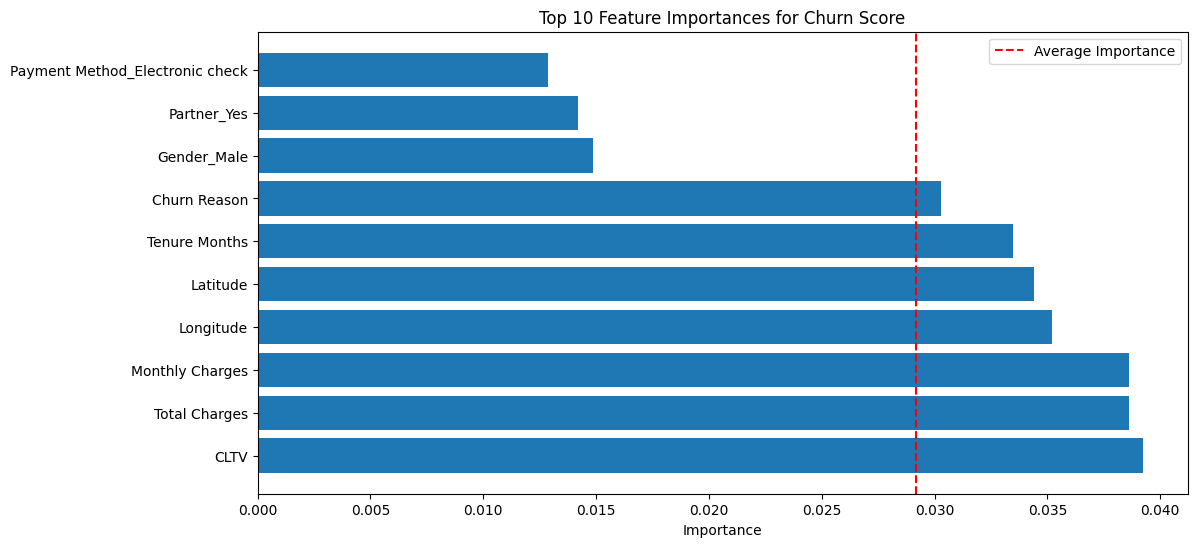

Average Importance of the Top 10 Features: 0.0292


In [44]:
# Select the top N features
top_n = 10  # Adjust as needed
top_features = feature_importance_df.nlargest(top_n, 'Importance')

# Calculate the average importance of the top N features
average_importance = top_features['Importance'].mean()

# Create a horizontal bar chart for the top features
plt.figure(figsize=(12, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.axvline(x=average_importance, color='red', linestyle='--', label='Average Importance')
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importances for Churn Score')
plt.legend()
plt.show()

# Print the average importance
print(f'Average Importance of the Top {top_n} Features: {average_importance:.4f}')


In [45]:
# # Load your dataset (assuming 'df' is your DataFrame)
# X = df[['CLTV', 'Total Charges', 'Monthly Charges', 'Longitude', 'Latitude', 'Tenure Months', 'Churn Reason', 'Gender_Male', 'Partner_Yes', 'Payment Method_Electronic check']]  # Select important features
# y = df['Churn Score']  # Target variable

# # Split the data into training and testing sets (e.g., 80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# #Feature Scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# model = LogisticRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

# print(classification_report(y_test, y_pred))

# confusion = confusion_matrix(y_test, y_pred)
# print('Confusion Matrix:')
# print(confusion)


#CONCLUSION
# The logistic regression model is performing very poorly with an accuracy of only around 2%.
# Precision, recall, and F1-score are generally low for most classes, indicating that the model's predictions are incorrect and it misses many actual instances.
# The confusion matrix shows that the model is struggling to make accurate predictions across all classes.

In [46]:
# from sklearn.model_selection import train_test_split

# # Split the data into features (X) and the target variable (y)
# X = df.drop(['Churn Score'], axis=1)
# y = df['Churn Score']

# # Split the data into training and testing sets (e.g., 80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# from sklearn.ensemble import RandomForestRegressor

# # Create a Random Forest Regressor model
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# # Train the model on the training data
# rf_model.fit(X_train, y_train)




In [47]:
# # Make predictions on the test set
# y_pred = rf_model.predict(X_test)

# # Evaluate the model's performance
# from sklearn.metrics import mean_squared_error, r2_score

# # Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred)

# # Calculate R-squared (R2) for model accuracy
# r2 = r2_score(y_test, y_pred)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2): {r2}")

# #CONCLUSION:
#  These results suggest that the current Random Forest Regressor model
#  may not be effectively predicting Churn Scores.
#  Further model improvement, feature engineering, and
#  data preprocessing may be needed to achieve more accurate predictions.

In [48]:
unique_counts = df.nunique()
single_unique_columns = unique_counts[unique_counts == 1].index.tolist()

if single_unique_columns:
    print("Columns with a single unique value:")
    for column in single_unique_columns:
        print(column)
else:
    print("No columns have a single unique value.")


Columns with a single unique value:
Count
Churn Value


In [49]:
#'Count' and 'Churn Value' have only 1 unique value, so we drop them.
df.drop(['Count', 'Churn Value'], axis=1, inplace=True)


In [50]:
# Find columns that start with 'City'
city_columns = [col for col in df.columns if col.startswith('City')]

# Drop the identified columns
df.drop(city_columns, axis=1, inplace=True)


In [51]:
# Find columns that start with 'City'
zip_columns = [col for col in df.columns if col.startswith('Zip')]

# Drop the identified columns
df.drop(zip_columns, axis=1, inplace=True)

In [52]:
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 1869


In [53]:
df.columns

Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'Churn Score', 'CLTV', 'Churn Reason', 'Gender_Male',
       'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [54]:
!pip install folium


In [57]:
!pip install --upgrade folium ipython


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.0/807.0 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.16.1 which is incompatible.


In [59]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import HTML

# Function to map churn scores to colors
def score_to_color(churn_score):
    color_palette = ['green', 'yellow', 'orange', 'red', 'darkred', 'black', 'purple', 'blue']
    score_ranges = [65, 70, 75, 80, 85, 90, 95, 100]  # Define your score ranges

    for i in range(len(score_ranges) - 1):
        if score_ranges[i] <= churn_score < score_ranges[i + 1]:
            return color_palette[i]

    return color_palette[-1]  # Assign the last color for scores above the defined range

# Calculate the center coordinates based on the average latitude and longitude
latitude_center = df['Latitude'].mean()
longitude_center = df['Longitude'].mean()

# Create a map centered at the calculated coordinates
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=12)

# Create a marker cluster group for better performance
marker_cluster = MarkerCluster().add_to(m)

# Define custom HTML for legend
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; background-color: white; padding: 10px; border: 2px solid gray;">
<b>Churn Score Legend</b><br>
<i style="background: green; padding: 5px;"></i> 65-70<br>
<i style="background: yellow; padding: 5px;"></i> 70-75<br>
<i style="background: orange; padding: 5px;"></i> 75-80<br>
<i style="background: red; padding: 5px;"></i> 80-85<br>
<i style="background: darkred; padding: 5px;"></i> 85-90<br>
<i style="background: black; padding: 5px;"></i> 90-95<br>
<i style="background: purple; padding: 5px;"></i> 95-100<br>
<i style="background: blue; padding: 5px;"></i> 100+
</div>
"""

# Add custom legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Loop through your DataFrame and add markers for each data point with color-coded icons
for index, row in df.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    churn_score = row['Churn Score']

    # Determine the marker color based on churn score
    marker_color = score_to_color(churn_score)

    # Create a marker with a popup displaying churn score and the assigned color
    marker = folium.Marker(
        [latitude, longitude],
        popup=f'Churn Score: {churn_score}',
        icon=folium.Icon(color=marker_color)
    )
    marker.add_to(marker_cluster)

# Display the map directly in Colab
HTML(m._repr_html_())



<ipython-input-59-d5c3a273c78b>:57: UserWarning: color argument of Icon should be one of: {'darkgreen', 'lightred', 'white', 'blue', 'darkred', 'cadetblue', 'darkpurple', 'beige', 'pink', 'darkblue', 'green', 'purple', 'lightblue', 'lightgray', 'red', 'lightgreen', 'gray', 'orange', 'black'}.
  icon=folium.Icon(color=marker_color)
